In [11]:



import pandas as pd

# import plotly.plotly as py <-Deprecated line
import plotly.graph_objs as go  #<-This is especially needed for Plotly graphs
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#############
## Needed for more recent Plotly stuff:

import chart_studio.plotly as py
pd.options.plotting.backend = 'plotly'
from chart_studio.plotly import plot

#############

# There's a notebook (included with course resources) to be a good reference

init_notebook_mode(connected = True)  # Enable to see things in JupyterNotebook



In [63]:
##3 USA Map

data = dict(type = 'choropleth',
           locations = ['AZ','CA','NY'],
           locationmode = 'USA-states',
            # locationmode: We're choosing one of the preset strings that plotly gives as an option
            colorscale = 'Greens',
            text = ['Arizona', 'Cali', 'New York'],  # text appears when hovering over
            z  = [1.0, 2.0, 3.0], # Values that colormap will use for the color gradient
            colorbar = {'title':'Colorbar Title'}
           )

In [64]:
data

{'type': 'choropleth',
 'locations': ['AZ', 'CA', 'NY'],
 'locationmode': 'USA-states',
 'colorscale': 'Greens',
 'text': ['Arizona', 'Cali', 'New York'],
 'z': [1.0, 2.0, 3.0],
 'colorbar': {'title': 'Colorbar Title'}}

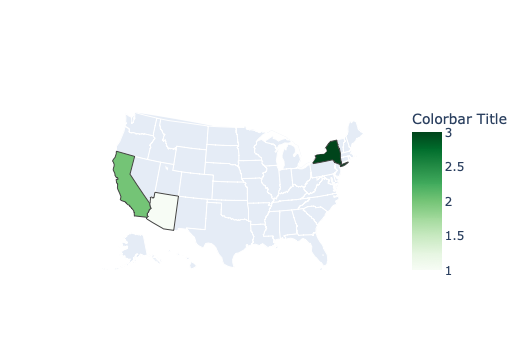

In [22]:
layout = dict(geo  = {'scope':'usa'})

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)

# plot(choromap) <-If I did "plot" (not "iplot"), it would open as a separate HTML file, that I could export as a JPG file
# Now, the interactive USA map is displayed below:

In [23]:
df = pd.read_csv('2011_US_AGRI_Exports')

In [24]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [44]:
data = dict(type = 'choropleth',
           # colorscale = 'YIOrRd',
           locations = df['code'],
           locationmode = 'USA-states',
           z = df['total exports'],
           text = df['text'],
           marker = dict(line = dict(color = 'rgb(255, 255, 255)', width = 2)),
            # Define a Marker that we'll show
            # AKA the drawn borders between states
           colorbar = {'title':'Millions USD'}
           )

In [45]:
layout = dict(title = '2011 US Agriculture Exports by State',
             geo = dict(scope = 'usa', showlakes = True, lakecolor = 'rgb(85, 173, 240)'))
# showLakes = yes, show the lakes in the map


In [46]:
layout

{'title': '2011 US Agriculture Exports by State',
 'geo': {'scope': 'usa', 'showlakes': True, 'lakecolor': 'rgb(85, 173, 240)'}}

In [47]:
choromap2 = go.Figure(data = [data], layout = layout)

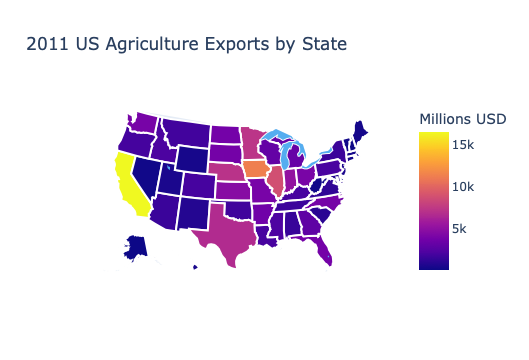

In [48]:
iplot(choromap2)

In [49]:
#### World Map

df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [56]:
data = dict(type = 'choropleth',
           locations = df['CODE'],
           z = df['GDP (BILLIONS)'],
           text = df['COUNTRY'],
           colorbar = {'title':'GDP in Billions (USD)'})

In [61]:
layout = dict(title = '2014 Global GDP',
             geo = dict(showframe = False,
                       # projection = {'type':'mercator'})
                       projection = {'type':'kavrayskiy7'})
              # This stuff is in Plotly's documentation
             )

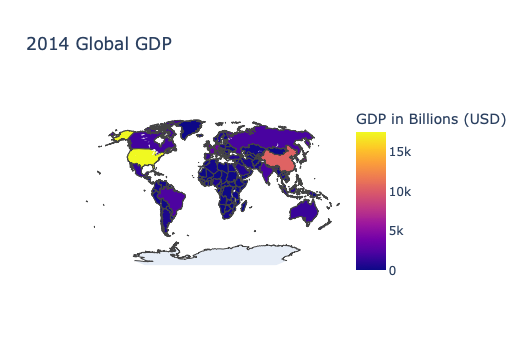

In [62]:
choromap3 = go.Figure(data = [data], layout = layout)
iplot(choromap3)

# World Map is displayed below:
# You can click and drag to rotate the globe

In [ ]:
# Reference for Plotly Geographical Mapping Documentaiton:
## https://plotly.com/python/reference/#choropleth